# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

# **Project** **Summary** **:**
In New York City many of people commute to different regions of city via taxi. A lot of streets and roads in New York city are quite busy due to traffic jams, construction, or road blockage etc. Therefore, it is very important to predict the trip duration of taxi so that the user will know how much time it will take to commute from one place to other. Also, due to the increasing popularity of app-based taxi such as ola or uber and there competitive pricing levels. Decisions has to be taken by the user for opting which one to choose based on trip pricing and duration. This prediction also helps drivers to choose route having lesser trip time. We were provided with dataset which is released by NYC Taxi and Limousine Commission. This dataset contains pickup time, drop-off time, geo- coordinates, number of passengers, trip duration and several other variables.
Our primary motives are to analyze the dataset, perform feature engineering to comes up with suitable independent features and building a good model that will help us in predicting the trip duration of NYC taxi.
Here, for prediction the taxi trip duration we have applied a linear regression, decision tree, random forest to find out which  will give better accuracy and with which model get lesser. So among this model random forest accuracy is better.


# **GitHub Link :**
https://github.com/yashdhandar/NYC-Taxi-Trip-Time-Prediction

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Loading Dataset

In [ ]:
#importing required packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading dataset
df= pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#Shape of data
df.shape

(1458644, 11)

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
df[df['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [ ]:
df[df['passenger_count']!=0].count()

id                    1458584
vendor_id             1458584
pickup_datetime       1458584
dropoff_datetime      1458584
passenger_count       1458584
pickup_longitude      1458584
pickup_latitude       1458584
dropoff_longitude     1458584
dropoff_latitude      1458584
store_and_fwd_flag    1458584
trip_duration         1458584
dtype: int64


# Checking for Dtype and null values

In [ ]:
#Attribute information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
#checking missing values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
#Check for duplicated values
print(df.duplicated().sum())

0




*   Good our dataset have no null values!!

# EDA And Data Preprocessing

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution for trip_duration')]

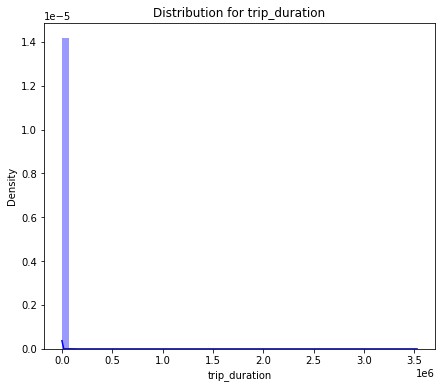

In [ ]:
#Dependent variable 'trip_duration'
plt.figure(figsize=(7,6))
sns.distplot(df['trip_duration'], color='blue').set(title='Distribution for trip_duration')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


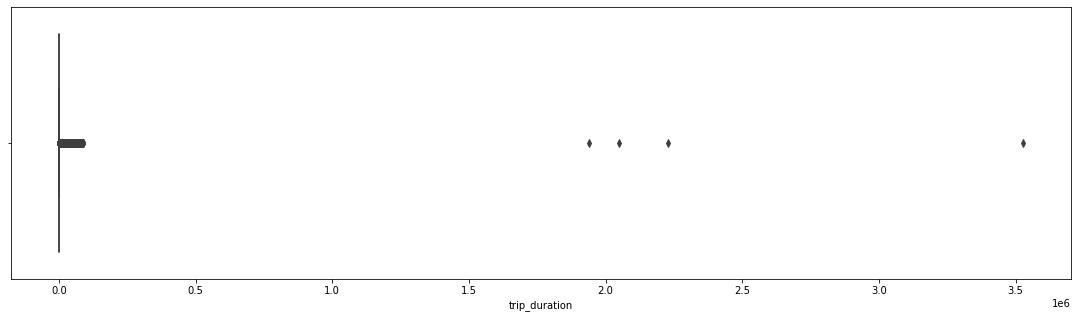

In [ ]:
#Visualising Trip duration we can clearly notice few outliers at extreme right
plt.figure(figsize=(19,5))
sns.boxplot(df['trip_duration'])



*   Probably in this visualization we can clearly see some outliers , their trips are lasting between 1900000 seconds (528 Hours) to somewhere around 3500000 (972 hours) seconds which is impossible in case of taxi trips , How can a taxi trip be that long ?
*   It’s Quite suspicious. We’ll have to get rid of those Outliers.



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'passenger count distribution')

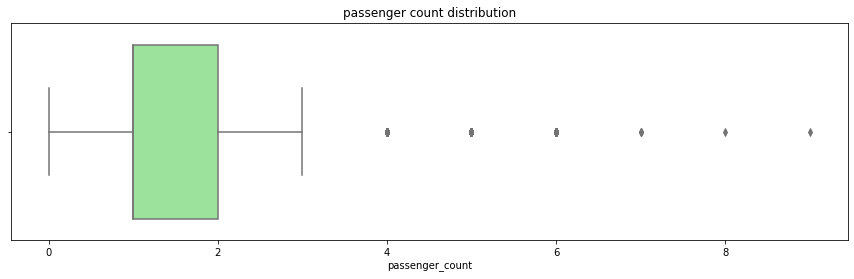

In [ ]:
#Spread of Passenger count
plt.figure(figsize=(15,4))
sns.boxplot(df['passenger_count'],color='lightgreen')
plt.title('passenger count distribution')



*   Most number of trips are done by 1-3 passenger(s).
*   Above 4 Passengers Indicate that the cab must be larger sized.



Text(0.5, 1.0, 'Store and Forward Flag')

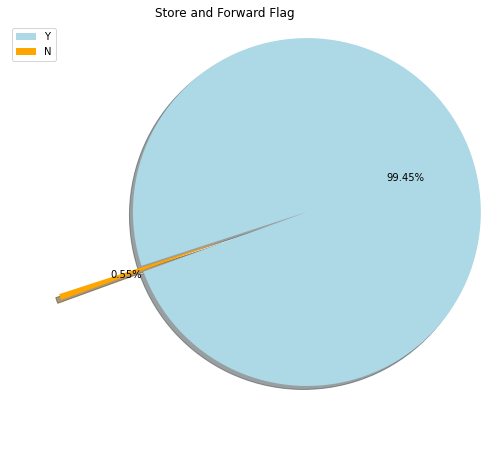

In [ ]:
plt.figure(figsize=(9,8))
plt.pie(df['store_and_fwd_flag'].value_counts(),colors=['lightblue','orange'], explode=[0.5,0], autopct='%1.2f%%',shadow=True, startangle=200)
plt.legend(labels=['Y','N'])
plt.title('Store and Forward Flag')



*   store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip.
*   Visualization tells us that there were very few trips of which the records were stored in memory due to no connection to the server.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'distribution plot with log tranformation of trip_duration')]

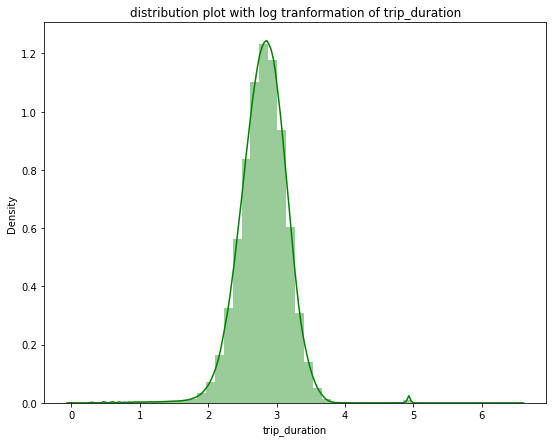

In [ ]:
#log tranformation
plt.figure(figsize=(9,7))
sns.distplot(np.log10(df['trip_duration']),color='g').set(title='distribution plot with log tranformation of trip_duration')



*   The log transformation made the data conform more closely to a normal distribution.
   



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'vendor_id')

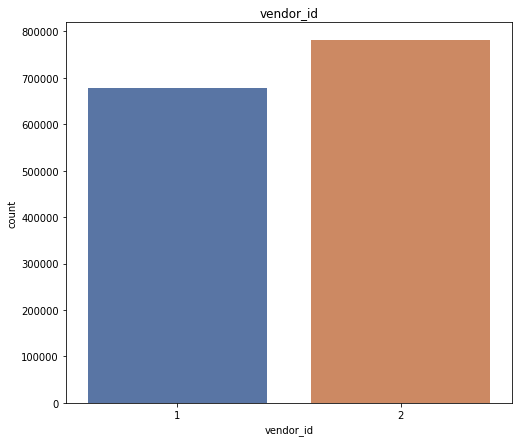

In [ ]:
#vendor_id - a code indicating the provider associated with the trip record
plt.figure(figsize=(8,7))
sns.countplot(df['vendor_id'], palette='deep')
plt.title('vendor_id')



*   From Above Visualization, we can say that there are 2 vendors (Service Providers).
*   2nd Service provider is the most opted one by New Yorkers.  



In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# Feature Enginerring



*   Let us create some new features from the existing variables so that we can gain more insights from the data.



In [ ]:
# We have pickup_datetime, dropoff_datetime of the type 'object'. Convert it into type 'datetime'. 

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df['pickup_day']= df['pickup_datetime'].dt.day_name()
df['dropoff_day']= df['dropoff_datetime'].dt.day_name()
df['pickup_weekday_num'] = df['pickup_datetime'].dt.weekday
df['month']=df['pickup_datetime'].dt.month
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

In [ ]:
def time_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [ ]:
df['Pickup_timezone'] = df['pickup_hour'].apply(lambda x: time_of_day(x))
df['Dropoff_timezone'] = df['dropoff_hour'].apply(lambda x: time_of_day(x))

In [ ]:
# Compute Distances using Longitudes & Latitudes

#Haversine Distance
def haversine_distance(lat1, lng1, lat2, lng2 ):
      R = 6371    # Average radius of earth
      lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
      delta_1 = lat2 - lat1
      delta_2 = lng2 - lng1
      a = np.sin(delta_1/2)**2 + np.cos(lat1) * np.cos(lat2) *np.sin(delta_2/2)**2
      c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
      return c * R

In [ ]:
#Manhattan Distance
def manhattan_distance(lat1, lng1, lat2, lng2):
   m = haversine_distance(lat1, lng1, lat1, lng2 )
   h = haversine_distance(lat1, lng1, lat2, lng1 )
   return m + h

In [ ]:
df.loc[:,'haversine_distance']=haversine_distance(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values,df['dropoff_longitude'].values)
df.loc[:,'manhattan_distance']=manhattan_distance(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values,df['dropoff_longitude'].values)

In [ ]:
# Get Average driving speed 
    # km/hr
    # (km/sec = 3600 * (km/hr))

df.loc[: ,'avg_speed_h']= 3600 * df["haversine_distance"] / df["trip_duration"]
df.loc[: ,'avg_speed_m']= 3600 * df["manhattan_distance"] / df["trip_duration"]

In [ ]:
# Load a list of holidays in the US
calender = USFederalHolidayCalendar()
holidays = calender.holidays()
td2 = pd.Timedelta(days=1)

df['pickup_holidays']=pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays)
df['pickup_holidays']=df.pickup_holidays.map(lambda x : 1 if x == True else 0 )

# If day is before or after a holiday
df['pickup_near_holiday'] = (pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays +td2) |
                             pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays - td2))
df['pickup_near_holiday'] = df.pickup_near_holiday.map(lambda x: 1 if x == True else 0)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,Pickup_timezone,Dropoff_timezone,haversine_distance,manhattan_distance,avg_speed_h,avg_speed_m,pickup_holidays,pickup_near_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,17,Evening,Evening,1.498521,1.735433,11.856428,13.730901,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,Late Night,Late Night,1.805507,2.430506,9.803659,13.197318,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,12,Morning,Morning,6.385098,8.203575,10.822201,13.904365,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,19,Evening,Evening,1.485498,1.661331,12.465721,13.941241,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,13,Noon,Noon,1.188588,1.199457,9.836594,9.926539,0,0


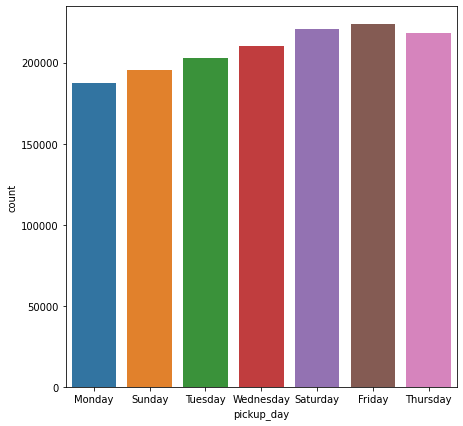

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x="pickup_day", data=df)
plt.show()



*   Observations tells us that Fridays and Saturdays are those days in a week when New Yorkers prefer to rome in the city.



Text(0.5, 1.0, ' distribution of number of pickups on each part of the day')

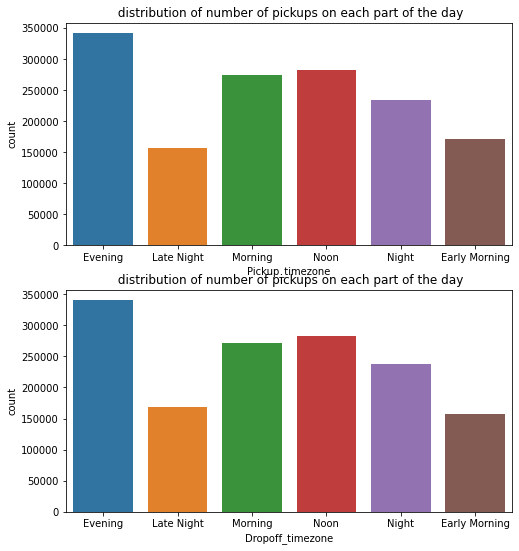

In [ ]:
fig, ax =plt.subplots(2,1,figsize=(8,9))
sns.countplot(x="Pickup_timezone", data=df, ax=ax[0])
ax[0].set_title(' distribution of number of pickups on each part of the day')
sns.countplot(x="Dropoff_timezone", data=df, ax=ax[1])
ax[1].set_title(' distribution of number of pickups on each part of the day')



*   Most number of trips are during the evening time and the least number of trips is between late night to early morning



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


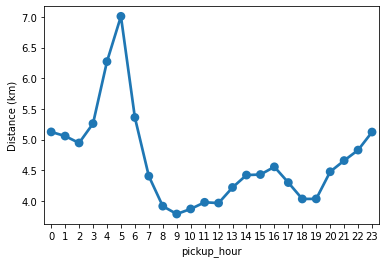

In [ ]:
group5 = df.groupby('pickup_hour').manhattan_distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (km)')
plt.show()



*   Trip distance is fairly equal from morning till the evening varying around 4 - 4.5 kms.
*   It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.

*   Trip distance is highest during early morning hours which can account for some things like: Outstation trips taken during the weekends. Longer trips towards the city airport which is located in the outskirts of the city.





/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


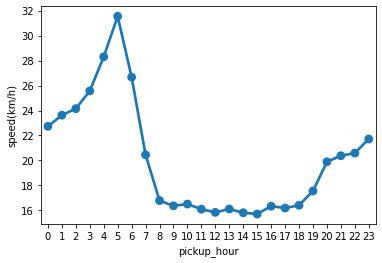

In [ ]:
group9 = df.groupby('pickup_hour').avg_speed_m.mean()
sns.pointplot(group9.index, group9.values)
plt.ylabel('speed(km/h)')
plt.show()



*   In the above graph Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours.

*   Average taxi speed is highest at 5 AM in the morning, then it declines steeply as the office hours approaches.
*   Average taxi speed is more or less same during the office hours i.e. from 8 AM till 6PM in the evening.



Double-click (or enter) to edit

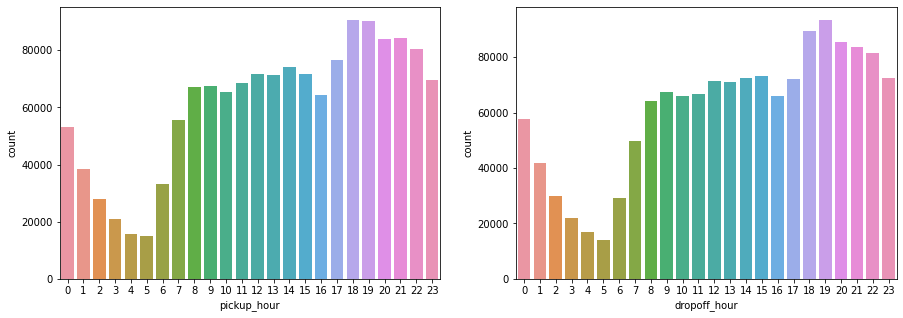

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1, figsize=(15,5))
ax=sns.countplot(x="pickup_hour", data=df, ax=ax1)
ax=sns.countplot(x="dropoff_hour", data=df, ax=ax2)



*   We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.v



# Geospatial Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

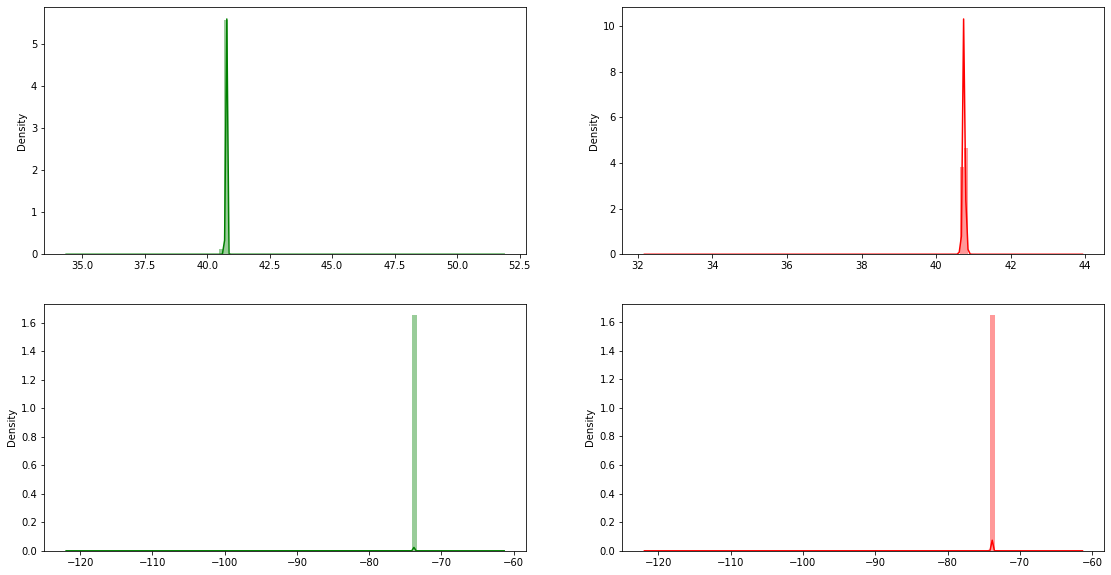

In [ ]:
# Plot a univariate distribution of observations for latitude and longitude values to get a sense of where the most of the rides
# are concentrated in terms of location.

fig, ax = plt.subplots(2,2,figsize=(19,10))
sns.distplot(df['pickup_latitude'].values, label='pickup_latitude', color= 'g', bins = 100, ax=ax[0,0])
sns.distplot(df['dropoff_latitude'].values, label='dropoff_latitude', color= 'r', bins = 100, ax=ax[0,1])
sns.distplot(df['pickup_longitude'].values, label='pickup_longitude', color= 'g', bins = 100, ax=ax[1,0])
sns.distplot(df['dropoff_longitude'].values, label='dropoff_longitude', color= 'r', bins = 100, ax=ax[1,1])

The above plots shows us that most of the rides are centered around the

following coordinates:

Latitude: 40 to 41

Longitude: -73 to -74

If we see from the means of the latitude and longitude values that we derived above, we see that these values are correct. Also, if we check out these coordinates on a map, we get that the coordinates of (40.60, 74.05) correspond to that of NYC. Hence, our plot is correct.

One anomaly that we see here is that some of the trips that are from some other lat like 32 to 44 are taking a very long time and hence effecting the plot as such. These values are outliers and in the next step, we'll provide the bounds for the coordinates so as to remove these outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

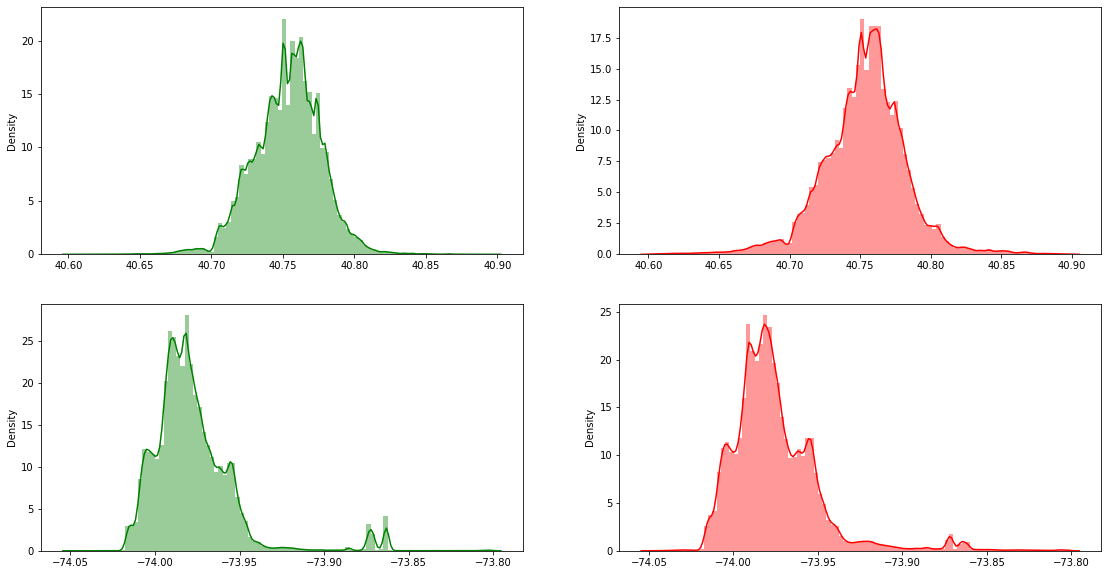

In [ ]:
# Add bounds to coordinates from the dataset to avoid Outliers affecting the plots
df_coord = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df_coord = df_coord.loc[(df.dropoff_latitude> 40.6) & (df.dropoff_latitude < 40.9)]
df_coord = df_coord.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.8)]
df_coord = df_coord.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.8)]

# Plot the distribution plot again with the same values but this time with the bounds in place for coordinates

fig, ax = plt.subplots(2,2,figsize=(19,10))
sns.distplot(df_coord['pickup_latitude'].values, label='pickup_latitude', color= 'g', bins = 100, ax=ax[0,0])
sns.distplot(df_coord['dropoff_latitude'].values, label='dropoff_latitude', color= 'r', bins = 100, ax=ax[0,1])
sns.distplot(df_coord['pickup_longitude'].values, label='pickup_longitude', color= 'g', bins = 100, ax=ax[1,0])
sns.distplot(df_coord['dropoff_longitude'].values, label='dropoff_longitude', color= 'r', bins = 100, ax=ax[1,1])

Let's compare the above two plots. The earlier plot has a lot of outliers and hence showed a large spike in values. On bounding the coordinates to a range of interest, we can now see that the values of latitude are in the range of about 40.60 to 40.90 and the values for longitudes should be in the range of about -74.05 to -73.75. This plot shows us that most of the trips are concentrated within these bounds of the coordinates.

PICKUP Points Analysis

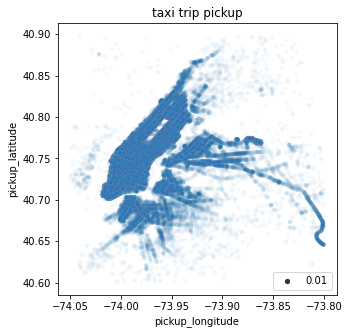

In [ ]:
# Plot for showing the Pickup and Dropoff locations separately for every taxi trip in NYC.
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_coord, x="pickup_longitude",y="pickup_latitude",size=0.01, alpha=0.04)
plt.title('taxi trip pickup')
plt.show()

DROPOFF Points Analysis

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


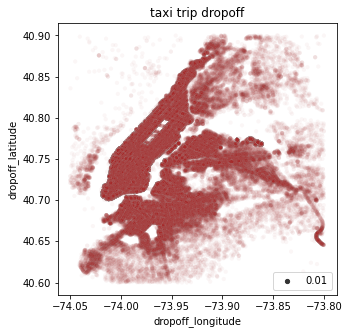

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_coord, x="dropoff_longitude",y="dropoff_latitude",size=0.01, alpha=0.04, color='brown')
plt.title('taxi trip dropoff')
plt.show()

In [ ]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in df.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)
    
display(mapa)



*   We can see that most no. of taxi trip is in the region of Manhattan and somewhat less in other areas like Brooklyn, Queens etc. This tells us that maximum number of trips for the taxi are in the Manhattan area. Ofcourse, these are the areas where you have Times Square, Central Park, Financial District etc. So, more number of people tend to use the taxi in this area. The area towards Brooklyn and Queens is more of residential area and has less number of companies. So, the number of taxi trips reduces here.



# Feature selection

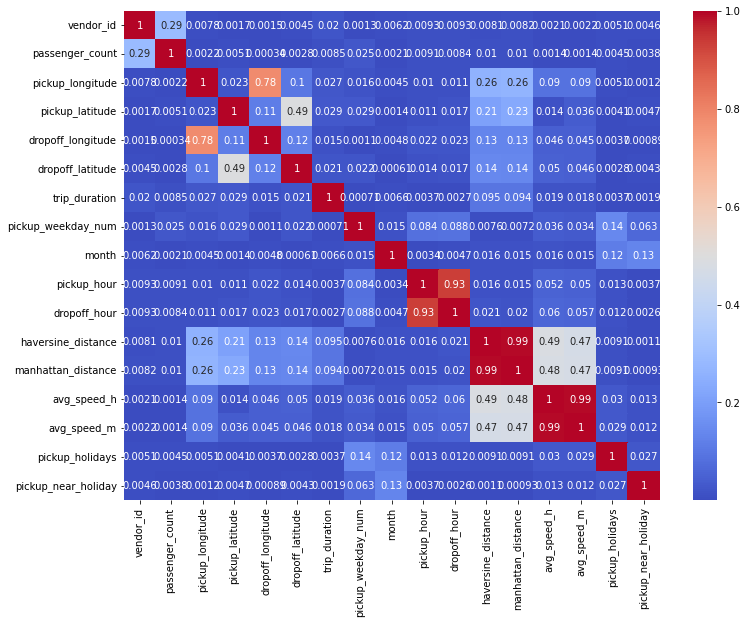

In [ ]:
plt.figure (figsize= (12,9))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')



*   The features which do not affect the target varible i.e. trip_duration much. Hence we should remove these features from our dataset. At the same time vendor_id doesn't affect much either so we can remove that as well.



In [ ]:
nyc_taxi_df = df.drop(['id','pickup_datetime','dropoff_datetime','Dropoff_timezone','Pickup_timezone','store_and_fwd_flag','pickup_day','dropoff_day'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_weekday_num,month,pickup_hour,dropoff_hour,haversine_distance,manhattan_distance,avg_speed_h,avg_speed_m,pickup_holidays,pickup_near_holiday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,3,17,17,1.498521,1.735433,11.856428,13.730901,0,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,6,0,0,1.805507,2.430506,9.803659,13.197318,0,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,1,11,12,6.385098,8.203575,10.822201,13.904365,0,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,2,4,19,19,1.485498,1.661331,12.465721,13.941241,0,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,5,3,13,13,1.188588,1.199457,9.836594,9.926539,0,0




*   Let us remove the columns which are not important for further analysis.
*   Features such as id, timestamp and weekday were not assigned to X array because they are of type object. And we need an array of float data type for further analysis.



In [ ]:
nyc_taxi_df.dtypes

vendor_id                int64
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
trip_duration            int64
pickup_weekday_num       int64
month                    int64
pickup_hour              int64
dropoff_hour             int64
haversine_distance     float64
manhattan_distance     float64
avg_speed_h            float64
avg_speed_m            float64
pickup_holidays          int64
pickup_near_holiday      int64
dtype: object

# Normalization


*   It is suggested to scale the input varibles to standardise the variance and avoid the bias.



In [ ]:
X = nyc_taxi_df .drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration']).values

In [ ]:
# Normalizing the Dataset using Standard Scaling Technique.

scaler=StandardScaler()
scaler.fit(X)
scaler_data = scaler.transform(X)
new_df=pd.DataFrame(scaler_data)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-1.561062,-0.307440,0.530263,0.524563,-0.452072,-0.478549,-0.171376,-0.243832,-0.137979,-0.192191
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,1.509502,1.477173,-2.126116,-2.097405,-0.380622,-0.355874,-0.308432,-0.270283,-0.137979,-0.192191
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-1.049301,-1.497182,-0.407283,-0.246604,0.685258,0.663036,-0.240428,-0.235233,-0.137979,5.203170
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.537541,0.287431,0.842778,0.833030,-0.455103,-0.491628,-0.130695,-0.233405,-0.137979,-0.192191
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,0.997741,-0.307440,-0.094768,-0.092371,-0.524207,-0.573146,-0.306233,-0.432422,-0.137979,-0.192191




*   Above , we had considered 17 as a required number of components and extracted new features by transforming the Data.


Building Model



*   We need a model to train on our dataset to serve our purpose of prediciting the NYC taxi trip duration given the other features as training and test set. Since our dependent variable contains continous values so we will use regression technique to predict our output



# Splitting the data in train and test sets


*   To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (30%).



In [ ]:
X=new_df
y= np.log(nyc_taxi_df['trip_duration']).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021050, 16), (437594, 16), (1021050,), (437594,))

# Linear Regression

In [ ]:
#Importing Linear Regression
regressor = LinearRegression()
y_=regressor.fit(X_train, y_train)
#Making prediction
y_pred = regressor.predict(X_test)
y_pred

array([6.25852354, 6.72906906, 6.1101255 , ..., 6.41059273, 6.66540026,
       6.5148183 ])

In [ ]:
regressor.intercept_, regressor.coef_

(6.464340646637436,
 array([ 9.92916200e-03,  7.88872099e-03, -8.33948837e-02,  3.17945959e-02,
         5.48857197e-02, -3.28798634e-02, -1.44250684e-02,  1.78608149e-02,
         5.33716130e-04,  2.41044575e-02,  2.80404235e+00, -2.15284499e+00,
        -2.56509316e+00,  2.26364317e+00, -1.68334612e-02, -6.01895415e-03]))

**Model Evaluation**

In [ ]:
#Evaluate the regressor on the Feature selection group
t_lgt= regressor.score(X_train, y_train)
print ("Training Score : " , t_lgt)

v_lgt=regressor.score(X_test, y_test)
print ("Validation Score : ", v_lgt)

cv_lgt=cross_val_score(regressor, X_train, y_train, cv=5).mean()
print ("Cross Validation Score : " , cv_lgt)

r2_lgt=  r2_score( y_test, y_pred)
print ("R2_Score : ",r2_lgt)

rmse_lgt=np.sqrt(mean_squared_error(y_test, y_pred))
print ("RMSE :",rmse_lgt)

Training Score :  0.48565837175003357
Validation Score :  0.49097250892167243
Cross Validation Score :  0.40892962713859154
R2_Score :  0.49097250892167243
RMSE : 0.5693808013118592


Double-click (or enter) to edit

In [ ]:
from sklearn.metrics import mean_squared_log_error
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.11464018891653321


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-59-0254bb40a82d>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


Text(0.5, 1.0, 'Test VS Prediction')

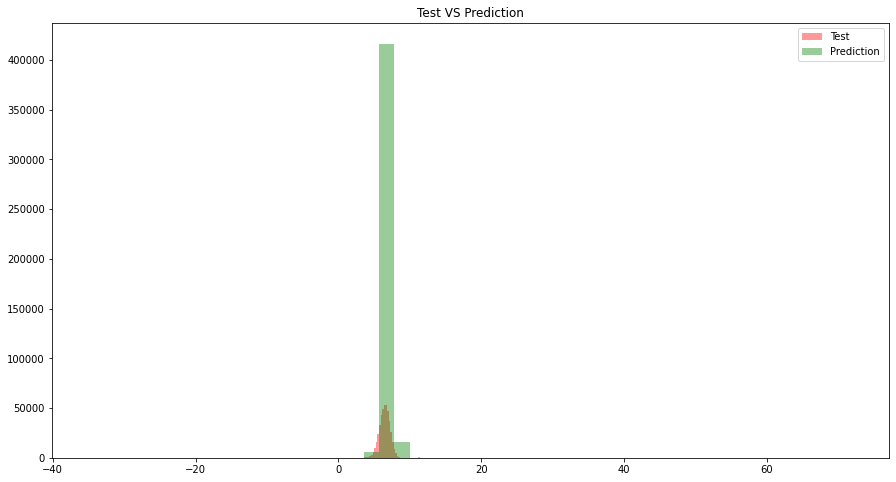

In [ ]:
#prediction vs real data
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="r", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")



*   From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in red) and Predicted values (in green) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction
*   Let's see if we can improve this further with the other algorigthm



# Decision Tree

In [ ]:
R_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
R_dt.fit(X_train, y_train)
dt_pred = R_dt.predict(X_test)
dt_pred

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


array([6.47418433, 7.58509926, 6.21304216, ..., 7.06029736, 7.57652488,
       6.56443524])

In [ ]:
#examining metrics
t_dt= R_dt.score(X_train, y_train)
print ("Training Score : " ,t_dt)

v_dt= R_dt.score(X_test, y_test)
print ("Validation Score : ", R_dt.score(X_test, y_test))

cv_dt= cross_val_score(R_dt, X_train, y_train, cv=5).mean()
print ("Cross Validation Score : " , cv_dt)

r2_dt=r2_score( y_test, dt_pred)
print ("R2_Score : ", r2_dt)

rmse_dt=np.sqrt(mean_squared_error(y_test, dt_pred))
print ("RMSE :" ,rmse_dt)

rmsl_=np.sqrt(mean_squared_log_error(dt_pred, y_test))
print ("RMSLE : ",rmsl_)

Training Score :  0.9762168380763555
Validation Score :  0.9754076105338462


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

Cross Validation Score :  0.9751178969705034
R2_Score :  0.9754076105338462
RMSE : 0.12515049288565222
RMSLE :  0.024195066961468916


In [ ]:
print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

RMSLE :  0.024195066961468916


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-63-bbf26b4ab52c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


Text(0.5, 1.0, 'Test VS Prediction')

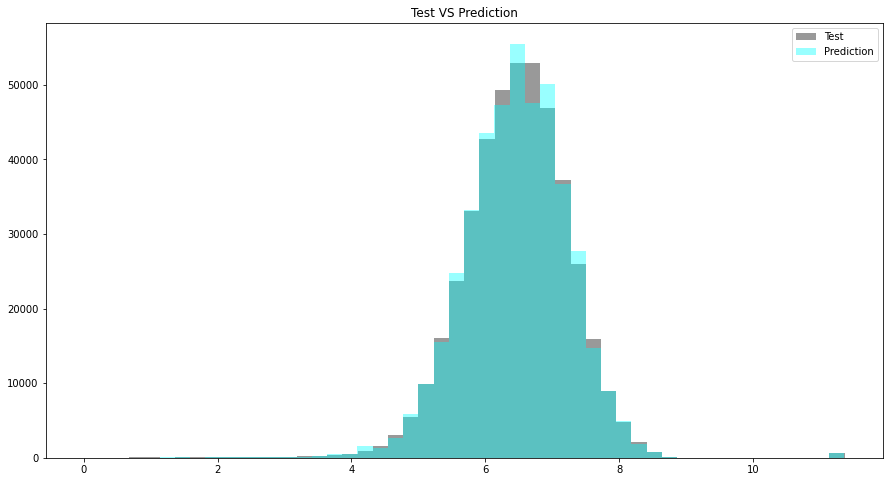

In [ ]:
#prediction vs real data
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")



*   There is approx 200% improvement on the R2 score for the Decision tree regressor over the Linear regressor of the feature selection group.
*   
From the above Viz. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in Red) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction



# Random Forest



*   Now, Let us also try Random Forest on our Data and see what do we get





In [ ]:
from sklearn.ensemble import RandomForestRegressor


est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


array([6.47852049, 7.53656326, 6.19956955, ..., 7.01855053, 7.54694933,
       6.57402502])

Model Evaluation

In [ ]:
#examining metrics
t_rf=est_rf.score(X_train, y_train)
print ("Training Score : " , t_rf)

v_rf=est_rf.score(X_test, y_test)
print ("Validation Score : ", v_rf)

cv_rf=cross_val_score(est_rf, X_train, y_train, cv=5).mean()
print ("Cross Validation Score : " , cv_rf)

r2_rf=r2_score(rf_pred, y_test)
print ("R2_Score : ", r2_rf)

rmse_rf=np.sqrt(mean_squared_error(y_test, rf_pred))
print ("RMSE :" ,rmse_rf)

rmsle_rf=np.sqrt(mean_squared_log_error(rf_pred, y_test))
print ("RMSLE : ", rmsle_rf)

Training Score :  0.9802286072534758
Validation Score :  0.9797642918069155


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

Cross Validation Score :  0.9792608840766766
R2_Score :  0.9791776155019344
RMSE : 0.11352497223462461
RMSLE :  0.022789617929859746


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-66-ad07196c9f33>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


Text(0.5, 1.0, 'Test VS Prediction')

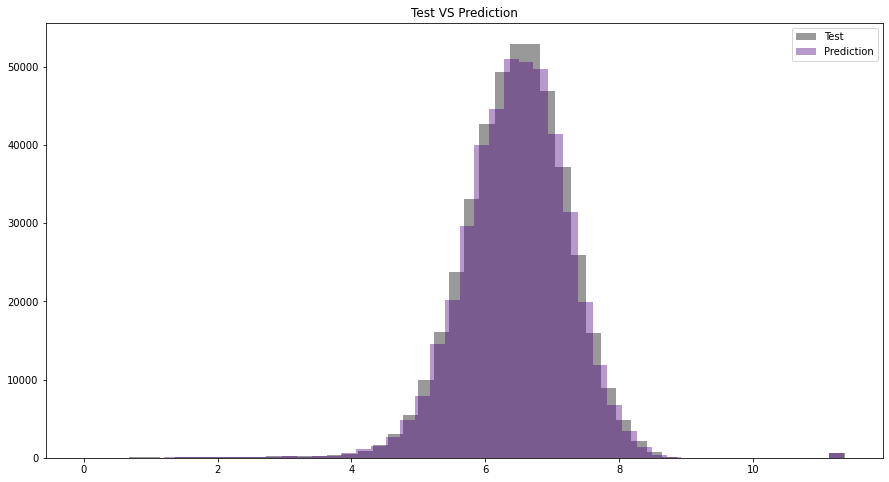

In [ ]:
#prediction vs real data
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")



*   From the above Viz. we can clearly identify that the Random Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in purple) are as close as possible. We can conclude that random forest could be a good choice for Trip duration prediction.
*   The performance of Random Forest is also better than Linear regressor and somewhat similar to the decision tree but There is slight difference in r2 score and rmsle value.



# Comparing the Model

In [ ]:
mod=['Linear Regression','Decision Tree','Random Forest']
data={'Training Score':[t_lgt, t_dt, t_rf], 'Validation Score':[v_lgt, v_dt, v_rf], 'Cross Validation' :[cv_lgt, cv_dt, cv_rf], 'R2_Score':[r2_lgt, r2_dt, r2_rf] ,'RMSLE':['_',rmsl_,rmsle_rf]}
result=pd.DataFrame(data=data, index=mod)
result

,Training Score,Validation Score,Cross Validation,R2_Score,RMSLE
Linear Regression,0.485658,0.490973,0.408930,0.490973,_
Decision Tree,0.976217,0.975408,0.975118,0.975408,0.024195
Random Forest,0.980229,0.979764,0.979261,0.979178,0.02279


**Conclusion on EDA:**



*   Vendor 2 has significantly more number of trips than Vendor 1.
*   Around 73% of the trips have only one passenger with some anomalies of 0, 7, 9 passengers.

*   Most of the trips were less than 10kms and were are of short duration as well (10-14 minutes)
*   Evenings had the maximum number of taxi trips whereas it was the least during Early Mornings

*   Increasing trend is observed in the number of trips from Monday to Friday and it decreases on the weekends.
*   Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours.

*   The correlation heat map shows that there is not much correlation among the independent and target variables, except for slight correlation among latitude and longitudes











**CONCLUSION ON MODEL TRAINING**



*   At the end we conclude our project with 3 models namely Linear Regression, Decision Tree and Random Forest. 

*   Decision Tree and Random Forest both model giving us a good score but One problem that might occur with Decision Tree is that it can overfit.

*   It gets overfitted on training data which couldn't predict well on unseen data.
*   A random forest chooses few number of rows at random and interprets results from all the Tress and combines it to get more accurate and stable final result.


*   Among this Random Forest performs the best on our dataset as we saw that the RMSLE values came out to be the least for the same.

